# Preprocesamiento

En esta cuarta etapa se van a tomar decisiones en línea con las estadísticas y análisis con tal de  preparar correctamente los datos que serán parte del entrenamiento y posterior validación de los modelos de predicción.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from nilmtk import DataSet
import warnings
from nilmtk import TimeFrame
warnings. filterwarnings("ignore")
plt.style.use('bmh')



In [2]:
#dataset de referencia 
deps = DataSet('dsualmh.h5')

elec=deps.buildings[1].elec # Todos los medidores



labels = pd.DataFrame({'Instances': list(range(1,12)),
                       'Meters': ['Main', 'Electric furnace', 'Microwave','Television','Kettle','Vacuum cleaner','Electric space heater','Electric shower heater','Fan','Fridge','Freezer']})

Meters={}
for x in range(len(labels)): Meters[elec[x+1]]=labels['Meters'][x]

## Cambio en el muestreo de datos e interpolación

Veamos si hay  seccion faltante

In [3]:
tf=elec[1].good_sections(full_results=True).combined()[0]
tf

TimeFrame(start='2022-11-07 10:25:50+01:00', end='2022-11-07 12:03:28+01:00', empty=False)

 Muestreo cada 10 segundos, promediando datos (mean)  y usando metodo relleno=ffill

In [4]:



ta = '2022-11-07 10:25:50+01:00' #tiempo inicial
tb = '2022-11-07 12:37:15+01:00' #tiempo final


next(elec[1].load(sample_period=10, resample_kwargs={'fill_method':'ffill', 'how': 'mean'}))[ta:tb]

physical_quantity             power     voltage                                \
type                      armonic17    armonic1 armonic31 armonic43 armonic30   
2022-11-07 10:25:50+01:00  0.000402  242.857437  0.047494  0.042690  0.010280   
2022-11-07 10:26:00+01:00  0.000401  242.696106  0.047373  0.041619  0.008226   
2022-11-07 10:26:10+01:00  0.000273  242.656036  0.049030  0.038144  0.011914   
2022-11-07 10:26:20+01:00  0.002099  235.115631  0.044591  0.036331  0.009901   
2022-11-07 10:26:30+01:00  0.001844  235.340317  0.047414  0.037789  0.009898   
...                             ...         ...       ...       ...       ...   
2022-11-07 12:02:40+01:00  0.003813  237.962494  0.031498  0.039806  0.008875   
2022-11-07 12:02:50+01:00  0.003595  237.947052  0.032224  0.040999  0.006995   
2022-11-07 12:03:00+01:00  0.002699  237.866257  0.031230  0.038140  0.008804   
2022-11-07 12:03:10+01:00  0.002938  237.652390  0.034016  0.036729  0.009252   
2022-11-07 12:03:20+01:00  0.001183  237.918365  0.045302  0.037372  0.009132   

physical_quantity           current                         power            \
type                      armonic37 armonic11 armonic35  armonic3 armonic45   
2022-11-07 10:25:50+01:00  0.006118  0.026471  0.007149  0.007827  0.000027   
2022-11-07 10:26:00+01:00  0.006301  0.026861  0.007196  0.005823  0.000029   
2022-11-07 10:26:10+01:00  0.005892  0.025940  0.006715  0.008699  0.000027   
2022-11-07 10:26:20+01:00  0.026271  0.056709  0.026864 -3.089723 -0.000149   
2022-11-07 10:26:30+01:00  0.011225  0.025263  0.005575 -3.286669 -0.000016   
...                             ...       ...       ...       ...       ...   
2022-11-07 12:02:40+01:00  0.006315  0.055994  0.009147  0.188628  0.000027   
2022-11-07 12:02:50+01:00  0.006453  0.055062  0.008921  0.187723  0.000021   
2022-11-07 12:03:00+01:00  0.006155  0.054393  0.008556  0.182922  0.000010   
2022-11-07 12:03:10+01:00  0.006264  0.052831  0.009242  0.184871  0.000011   
2022-11-07 12:03:20+01:00  0.006066  0.042757  0.008787  0.187204  0.000021   

physical_quantity          ...             voltage  frequency   voltage  \
type                       ... armonic39 armonic25             armonic3   
2022-11-07 10:25:50+01:00  ... -0.000070  0.018903  50.006420  1.965135   
2022-11-07 10:26:00+01:00  ... -0.000065  0.021918  50.001747  1.957916   
2022-11-07 10:26:10+01:00  ... -0.000059  0.024827  49.997543  1.956758   
2022-11-07 10:26:20+01:00  ... -0.000119  0.026229  49.995106  2.662496   
2022-11-07 10:26:30+01:00  ... -0.000047  0.023774  49.998772  2.815987   
...                        ...       ...       ...        ...       ...   
2022-11-07 12:02:40+01:00  ... -0.000022  0.058210  49.956417  2.126488   
2022-11-07 12:02:50+01:00  ...  0.000018  0.047156  49.951290  2.118529   
2022-11-07 12:03:00+01:00  ...  0.000041  0.044464  49.946812  2.094144   
2022-11-07 12:03:10+01:00  ...  0.000040  0.039664  49.945564  2.102654   
2022-11-07 12:03:20+01:00  ...  0.000017  0.038568  49.948425  2.121185   

physical_quantity                     current             voltage   current  \
type                      armonic45 armonic38 armonic28 armonic39 armonic49   
2022-11-07 10:25:50+01:00  0.010471  0.001075  0.001751  0.016650  0.003344   
2022-11-07 10:26:00+01:00  0.011483  0.001103  0.002008  0.018264  0.003079   
2022-11-07 10:26:10+01:00  0.011760  0.001110  0.001819  0.019140  0.002983   
2022-11-07 10:26:20+01:00  0.015496  0.018573  0.020428  0.017374  0.022029   
2022-11-07 10:26:30+01:00  0.015364  0.003314  0.003590  0.017285  0.003437   
...                             ...       ...       ...       ...       ...   
2022-11-07 12:02:40+01:00  0.008946  0.001291  0.002288  0.015781  0.002366   
2022-11-07 12:02:50+01:00  0.008844  0.001214  0.001944  0.015618  0.003075   
2022-11-07 12:03:00+01:00  0.008103  0.001384  0.002061  0.015826  0.002893   
2022-11-07 12:03:10+01:00  0.009699  0.001367  0.002382  0.012948  0.0031

Muestreo cada 10 segundos, promediando datos (mean) como metodo de relleno y usando el primer dato

In [5]:

ta = '2022-11-07 10:25:50+01:00' #tiempo inicial
tb = '2022-11-07 12:37:15+01:00' #tiempo final


next(elec[1].load(sample_period=10, resample_kwargs={'fill_method':'ffill', 'how': 'first'}))[ta:tb]

physical_quantity             power     voltage                                \
type                      armonic17    armonic1 armonic31 armonic43 armonic30   
2022-11-07 10:25:50+01:00  0.001200  242.963882  0.052794  0.034804  0.010752   
2022-11-07 10:26:00+01:00  0.000282  242.727890  0.050520  0.039225  0.009854   
2022-11-07 10:26:10+01:00  0.000717  242.679214  0.047218  0.030712  0.013423   
2022-11-07 10:26:20+01:00  0.000278  240.503952  0.052786  0.033910  0.020599   
2022-11-07 10:26:30+01:00  0.002077  235.456329  0.047025  0.043736  0.013097   
...                             ...         ...       ...       ...       ...   
2022-11-07 12:02:40+01:00  0.004055  237.928558  0.026795  0.039172  0.008597   
2022-11-07 12:02:50+01:00  0.004195  237.953110  0.035219  0.043048  0.007372   
2022-11-07 12:03:00+01:00  0.002668  238.036713  0.029423  0.040315  0.009668   
2022-11-07 12:03:10+01:00  0.002181  237.755402  0.033528  0.031406  0.009268   
2022-11-07 12:03:20+01:00  0.000410  237.916321  0.056701  0.033994  0.009187   

physical_quantity           current                         power            \
type                      armonic37 armonic11 armonic35  armonic3 armonic45   
2022-11-07 10:25:50+01:00  0.005108  0.028248  0.006997  0.008345  0.000033   
2022-11-07 10:26:00+01:00  0.006209  0.026315  0.007230  0.007685  0.000007   
2022-11-07 10:26:10+01:00  0.005779  0.026698  0.006578  0.008449  0.000014   
2022-11-07 10:26:20+01:00  0.036281  0.060377  0.040983 -0.653571 -0.000117   
2022-11-07 10:26:30+01:00  0.010388  0.017776  0.006984 -2.978226 -0.000039   
...                             ...       ...       ...       ...       ...   
2022-11-07 12:02:40+01:00  0.006190  0.057036  0.009426  0.187972  0.000026   
2022-11-07 12:02:50+01:00  0.006306  0.052774  0.008622  0.182974  0.000030   
2022-11-07 12:03:00+01:00  0.005571  0.055494  0.007937  0.185937  0.000005   
2022-11-07 12:03:10+01:00  0.007340  0.055969  0.008922  0.185785  0.000009   
2022-11-07 12:03:20+01:00  0.006102  0.040188  0.008856  0.194477  0.000017   

physical_quantity          ...             voltage  frequency   voltage  \
type                       ... armonic39 armonic25             armonic3   
2022-11-07 10:25:50+01:00  ... -0.000078  0.018836  50.006302  1.981768   
2022-11-07 10:26:00+01:00  ... -0.000082  0.018709  50.005642  1.963668   
2022-11-07 10:26:10+01:00  ... -0.000062  0.026417  49.997860  1.973353   
2022-11-07 10:26:20+01:00  ... -0.000284  0.033305  49.996620  2.057200   
2022-11-07 10:26:30+01:00  ... -0.000044  0.026536  49.993740  2.804693   
...                        ...       ...       ...        ...       ...   
2022-11-07 12:02:40+01:00  ... -0.000024  0.044458  49.953800  2.130652   
2022-11-07 12:02:50+01:00  ... -0.000007  0.062078  49.957821  2.102524   
2022-11-07 12:03:00+01:00  ...  0.000039  0.042794  49.944439  2.115834   
2022-11-07 12:03:10+01:00  ...  0.000082  0.046866  49.948082  2.111915   
2022-11-07 12:03:20+01:00  ...  0.000015  0.050648  49.944199  2.145592   

physical_quantity                     current             voltage   current  \
type                      armonic45 armonic38 armonic28 armonic39 armonic49   
2022-11-07 10:25:50+01:00  0.013429  0.000658  0.001470  0.015970  0.002928   
2022-11-07 10:26:00+01:00  0.009596  0.000929  0.002056  0.017238  0.002431   
2022-11-07 10:26:10+01:00  0.008221  0.001120  0.002126  0.021775  0.002931   
2022-11-07 10:26:20+01:00  0.015596  0.031969  0.036440  0.015680  0.028894   
2022-11-07 10:26:30+01:00  0.015308  0.003365  0.002808  0.014264  0.001807   
...                             ...       ...       ...       ...       ...   
2022-11-07 12:02:40+01:00  0.009086  0.001343  0.001836  0.014779  0.001649   
2022-11-07 12:02:50+01:00  0.009046  0.001017  0.002106  0.011207  0.002522   
2022-11-07 12:03:00+01:00  0.006493  0.001207  0.001866  0.019258  0.002519   
2022-11-07 12:03:10+01:00  0.014096  0.000958  0.002676  0.015148  0.0038

# Obtener los datos del medidor principal  cada 60 segundos.

Además del parámetro sample_period=60, requerido para cambiar el muestreo a un minuto, se ha especificado como método (how) de cambio de muestreo el que provee NILMTK por defecto (mean). En el mismo diccionario resample_kwargs se ha especificado el parámetro fill_method el cual corresponderá al método elegido para rellenar los huecos. En este caso se especifica el método ffill el cual, ante un hueco, rellenará los datos faltantes hacia adelante con el valor inmediatamente anterior a la serie de tiempo

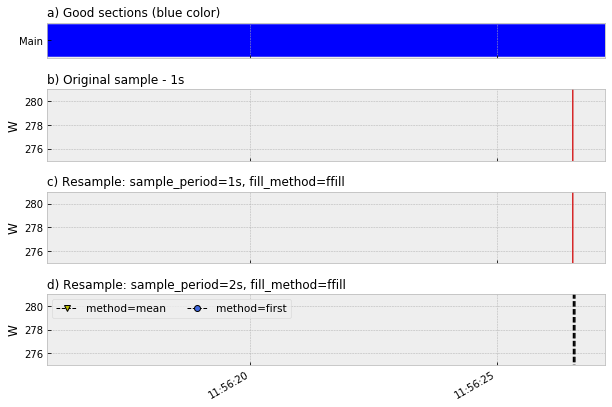

In [6]:
rcParams['figure.figsize'] = (10, 7)

#rcParams['figure.figsize'] = (25, 20)



ta = '2022-11-07 11:25:50+01:00' #tiempo inicial
tb = '2022-11-07 11:37:15+01:00' #tiempo final

#contador principal
Main=elec.select(instance=[1])

#definición de  gráficas
fig, (ax4, ax1, ax2, ax3) = plt.subplots(4, 1, sharex=True,
                                         gridspec_kw={'hspace': 0.5,'height_ratios':[1.5, 3, 3, 3]})


#sample a segundo
elec[1].power_series_all_data()[ta:tb].plot(ax=ax1, color='tab:red', marker="o", lw=1.5)

ax1.minorticks_off()

ax1.set_ylabel('W')
ax1.set_title('b) Original sample - 1s', fontsize=12, loc='left')
#ax1.annotate("|10:25:00 = 277 W", xy=('2022-11-23 10:25:00+01:00', 277.6),rotation=7)

ax1.set_ylim(275,281)


#sample a 1 segundo metodo fill
elec[1].power_series_all_data(sample_period=1, resample_kwargs={'fill_method': 'ffill'})[ta:tb].plot(ax=ax2, marker="o", color='tab:red',lw=1.5)
ax2.minorticks_off()
ax2.set_ylabel('W')
ax2.set_title('c) Resample: sample_period=1s, fill_method=ffill', fontsize=12, loc='left')
#ax2.annotate("|10:25:00 = 277 W", xy=('2022-11-23 10:25:00+01:00', 277.6))
ax2.set_ylim(275,281)



#sample a 2 segundos metodo fill
elec[1].power_series_all_data(sample_period=4,resample_kwargs={'how': 'first'})[ta:tb].plot(ax=ax3, color='k', lw=1.5, ls='--', marker="o",
                                                           markersize=8, markerfacecolor='royalblue')
elec[1].power_series_all_data(sample_period=4, resample_kwargs={'how': 'mean'})[ta:tb].plot(ax=ax3, color='k', lw=1.5, ls='--', marker="v",
                          markersize=8, markerfacecolor='y')
ax3.minorticks_off()
ax3.set_ylabel('W')
ax3.set_title('d) Resample: sample_period=2s, fill_method=ffill', fontsize=12, loc='left')
ax3.set_ylim(275,281)



#good sections
import matplotlib.lines as mlines
line1 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="o", markersize=6, markerfacecolor='royalblue', label='method=first')
line2 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="v", markersize=6, markerfacecolor='y', label='method=mean')
ax3.legend(handles=[line2, line1], fontsize=10.5, ncol=2)
ax4=Main.plot_good_sections(ax=ax4)
ax4.set_yticklabels(list(Meters.values()))
ax4.grid(axis='y')
ax4.set_title('a) Good sections (blue color)', fontsize=12, loc='left')
l=['11:56:20','11:56:25','11:56:30','11:56:35','11:56:40','11:56:45','11:56:50']
ax4.set_xticklabels(l, rotation=30, ha='right')



#guarda gráfico
plt.savefig('./data/images/3.1_Prepros_1.svg', bbox_inches='tight', transparent=True)
pass



## Filtros de dispositivos eléctricos

Vamos a filtrar por aquellos dispositivos cuya potencia activa sea superior a 5,85kwh

In [7]:
Devices=elec.select(instance=[2,3,4,5,6,7,8,9,10,11]) #MeterGroup de dispositivos
d=Devices.energy_per_meter().loc['active']  #energía kWh
d[d>5.85] #filtra dispositivos menores o iguales a 5.85 kWh (5% consumo)

10/10 ElecMeter(instance=11, building=1, dataset='dsualmh', appliances=[Appliance(type='freezer', instance=1)])instance=1)])

Series([], Name: active, dtype: float64)

Vemos  el top-k entre los dispositivos electricos conectados

In [8]:
Devices = elec.select(instance=[2,3,4,5,6,7,8,9,10,11])
Devices.select_top_k(k=5)

10/10 ElecMeter(instance=11, building=1, dataset='dsualmh', appliances=[Appliance(type='freezer', instance=1)])instance=1)])

MeterGroup(meters=
  ElecMeter(instance=8, building=1, dataset='dsualmh', appliances=[Appliance(type='electric shower heater', instance=1)])
  ElecMeter(instance=2, building=1, dataset='dsualmh', appliances=[Appliance(type='electric furnace', instance=1)])
  ElecMeter(instance=7, building=1, dataset='dsualmh', appliances=[Appliance(type='electric space heater', instance=1)])
  ElecMeter(instance=5, building=1, dataset='dsualmh', appliances=[Appliance(type='kettle', instance=1)])
  ElecMeter(instance=3, building=1, dataset='dsualmh', appliances=[Appliance(type='microwave', instance=1)])
)

## División del dataset

- train: conjunto de datos de entrenamiento de modelos de desagregación
- test: conjunto de datos de validación y pruebas de modelos de desagregación

## Entrenamiento:

In [12]:
train = DataSet('dsualmh.h5')

train.set_window(start="2022-11-07 10:25:00", end="2022-11-07 11:25:00")

train_elec=train.buildings[1].elec

train_elec.get_timeframe()

TimeFrame(start='2022-11-07 10:25:50+01:00', end='2022-11-07 11:25:00+01:00', empty=False)

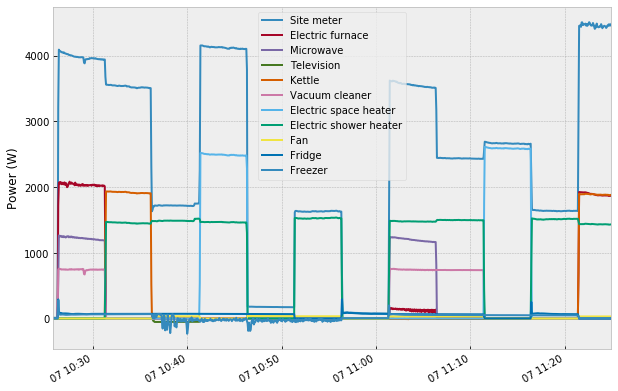

In [13]:
train_elec.plot()
#no hay datos train_elec.submeters().plot()



## Validación:

In [14]:
 #Validación 

valid = DataSet('dsualmh.h5')

valid.set_window(start="2022-11-07 11:25:00", end="2022-11-07 11:35:00")

valid_elec=valid.buildings[1].elec

valid_elec.get_timeframe()

TimeFrame(start='2022-11-07 11:25:00+01:00', end='2022-11-07 11:35:00+01:00', empty=False)

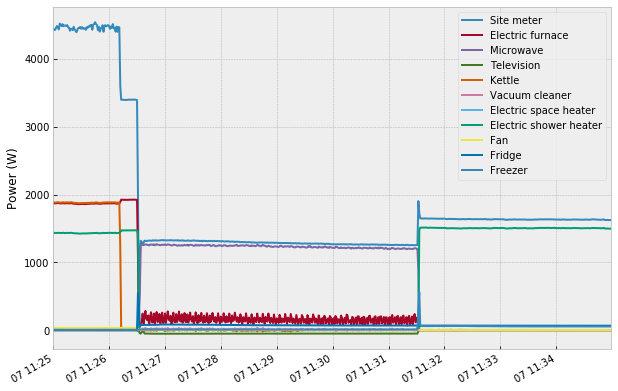

In [15]:
valid_elec.mains().plot()
valid_elec.submeters().plot()

## Pruebas

In [16]:
test = DataSet('dsualmh.h5') #Pruebas

test.set_window(start="2022-11-07 11:35:00", end="2022-11-07 12:37:00")
test_elec=test.buildings[1].elec

test_elec.get_timeframe()

TimeFrame(start='2022-11-07 11:35:00+01:00', end='2022-11-07 12:37:00+01:00', empty=False)

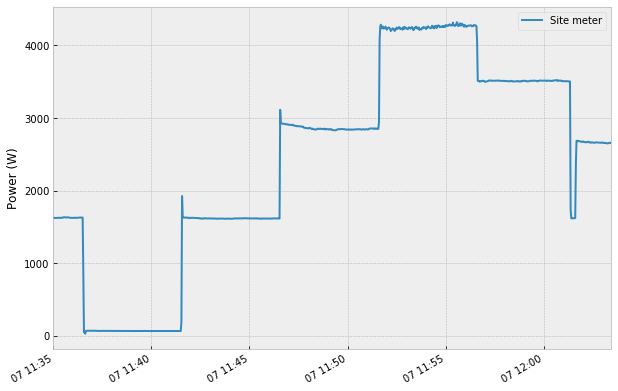

In [17]:
test_elec.mains().plot()